
# <center> <font size="20"> DS 861 FINAL EXAM </font>
<center> <font size="5"> KARAN CHHEDA - 921410734 </font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn import feature_selection
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm

In [2]:
ConversionData = pd.read_csv("conversion_data.csv")
ConversionData.head(5)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


----------------------------------------------------------------------------------

### <center> Basic Exploratory Data Analysis

In [3]:
# To check if there are any missing/null values

ConversionData.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [4]:
# To compute and display summary statistics for our data

ConversionData.describe().applymap(lambda x: f"{x:0.2f}")

,age,new_user,total_pages_visited,converted
count,316200.00,316200.00,316200.00,316200.00
mean,30.57,0.69,4.87,0.03
std,8.27,0.46,3.34,0.18
min,17.00,0.00,1.00,0.00
25%,24.00,0.00,2.00,0.00
50%,30.00,1.00,4.00,0.00
75%,36.00,1.00,7.00,0.00
max,123.00,1.00,29.00,1.00


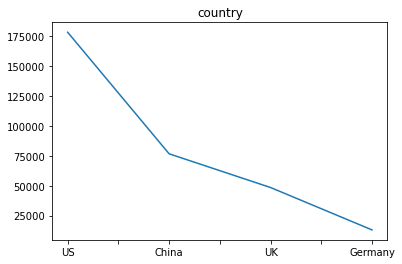

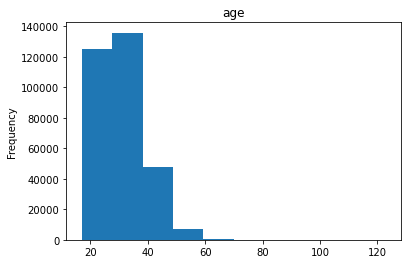

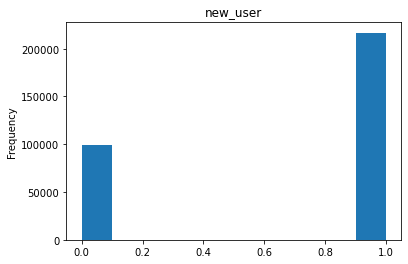

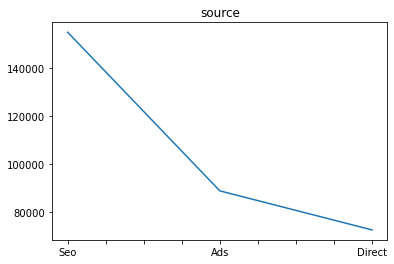

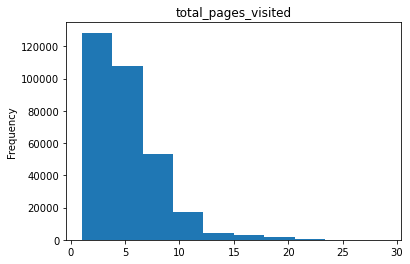

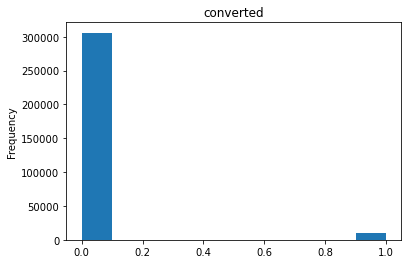

In [5]:
# Visualization of data

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

for column in ConversionData:
    plt.figure(column)
    plt.title(column)
    if is_numeric_dtype(ConversionData[column]):
        ConversionData[column].plot(kind='hist')
    elif is_string_dtype(ConversionData[column]):
        ConversionData[column].value_counts()[:10].plot()

<AxesSubplot:>

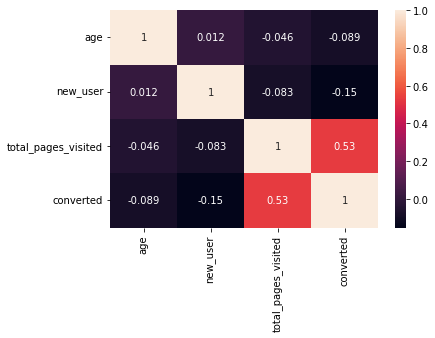

In [6]:
# To display the correlation - to demonstrate a linear relationship between each variable.

correlation = ConversionData.corr()
sns.heatmap(correlation, annot= True)

Thus, from the correlation matrix, total_pages_visited is almost not correlated with age and new_user, however, it has significant correlation with converted. Perhaps total_pages_visited is the best converted predictor.

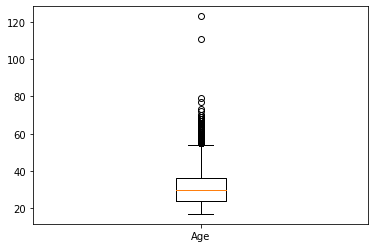

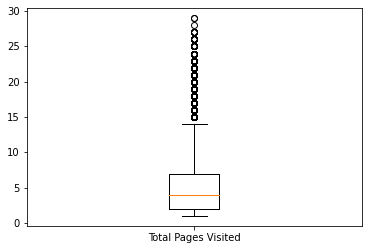

In [7]:
# Plotting boxplots to find outliers  

plt.boxplot(ConversionData['age'])
plt.xticks([1],['Age'])
plt.show()

plt.boxplot(ConversionData['total_pages_visited'])
plt.xticks([1],['Total Pages Visited'])
plt.show()

On displaying the boxplots, we can identify that there are outliers (anything that is more than 1.5IQR above Q3 or 1.5QR below Q1). Thus, we should get rid of these outliers from Age and Total_pages_visited columns.

In [8]:
# lenght of the original data

l1 = len(ConversionData)
print(l1)

316200


In [9]:
# To find the Interquartile Range for Age and dropping the outliers. 

Q1 = ConversionData.age.quantile(0.25)
Q3 = ConversionData.age.quantile(0.75)
IQR = Q3 - Q1

ConversionData.drop(ConversionData[ConversionData['age'] > (Q3 + 1.5*IQR)].index, inplace = True)

In [10]:
# To check the length of the data again. 

l2 =len(ConversionData.age)
print(l2)

314650


On dropping the outliers from the Age column, we reduced the number of obeservations by 1550.

In [11]:
# To find the Interquartile Range for total_pages_visited and dropping the outliers. 

Q1 = ConversionData.total_pages_visited.quantile(0.25)
Q3 = ConversionData.total_pages_visited.quantile(0.75)
IQR = Q3 - Q1

ConversionData.drop(ConversionData[ConversionData['total_pages_visited'] > (Q3 + 1.5*IQR)].index, inplace = True)

In [12]:
# To check the length of the data again. 

l3 = len(ConversionData.total_pages_visited)
print(l3)

308994


On dropping the outliers from the total_pages_visited column, we reduced the number of obeservations by 5656.
- Thus, we got rid of 7206 outliers in total. 

In [13]:
# To find the mean of converted in our data. 

ConversionData['converted'].mean()



0.01655695579849447

From this mean we can say that, if we were to predict that no one has converted, our error would be 1.6%. Thus, we would want our prediction models to have error rate lesser than 1.6%.

In [14]:
# To find the trend of conversion with respect to age

ConversionData[ConversionData.converted == 1].age.describe()

count    5116.000000
mean       26.486904
std         6.868207
min        17.000000
25%        21.000000
50%        25.000000
75%        31.000000
max        53.000000
Name: age, dtype: float64

In [15]:
# To find the trend of conversion with respect to total_pages_visited


ConversionData[ConversionData.converted == 1].total_pages_visited.describe()

count    5116.000000
mean       11.395231
std         2.352547
min         2.000000
25%        10.000000
50%        12.000000
75%        13.000000
max        14.000000
Name: total_pages_visited, dtype: float64

In [16]:
# To find the conversion rate per country

CR_UK = round(len(ConversionData[(ConversionData.converted == 1) & (ConversionData.country == 'UK')])/len(ConversionData[ConversionData['country'] == 'UK'])*100,2)
CR_US = round(len(ConversionData[(ConversionData.converted == 1) & (ConversionData.country == 'US')])/len(ConversionData[ConversionData['country'] == 'US'])*100,2)
CR_China = round(len(ConversionData[(ConversionData.converted == 1) & (ConversionData.country == 'China')])/len(ConversionData[ConversionData['country'] == 'China'])*100,2)
CR_Germany = round(len(ConversionData[(ConversionData.converted == 1) & (ConversionData.country == 'Germany')])/len(ConversionData[ConversionData['country'] == 'Germany'])*100,2)

print('The conversion rate of users in USA is =', CR_US,'%')
print('The conversion rate of users in UK is =', CR_UK,'%')
print('The conversion rate of users in China is =', CR_China,'%')
print('The conversion rate of users in Germany is =', CR_Germany,'%')

The conversion rate of users in USA is = 1.93 %
The conversion rate of users in UK is = 2.78 %
The conversion rate of users in China is = 0.08 %
The conversion rate of users in Germany is = 3.26 %


---------------------------------------------

### <center> Logistic Regression Model - To make Interpretations

In [14]:
# To create dummy variables and drop original qualitative values.

CountryDummy = pd.get_dummies(ConversionData.country, prefix = 'Country')
del CountryDummy['Country_China']

SourceDummy = pd.get_dummies(ConversionData.source, prefix = 'Source')
del SourceDummy['Source_Ads']

ConversionData = pd.concat([ConversionData, CountryDummy,SourceDummy], axis=1)

del ConversionData['country']
del ConversionData['source']

In [15]:
ConversionData = ConversionData[['age','new_user','total_pages_visited','Country_Germany','Country_UK','Country_US','Source_Direct','Source_Seo','converted']]
ConversionData.head(5)

,age,new_user,total_pages_visited,Country_Germany,Country_UK,Country_US,Source_Direct,Source_Seo,converted
0,25,1,1,0,1,0,0,0,0
1,23,1,5,0,0,1,0,1,0
2,28,1,4,0,0,1,0,1,0
3,39,1,5,0,0,0,0,1,0
4,30,1,6,0,0,1,0,1,0


In [16]:
# Defining X and y

listOfAllVariables = ConversionData.columns.values
X = ConversionData[listOfAllVariables]
del X['converted']
y = ConversionData['converted']

In [17]:
# To fit the data with a Logistic Regression Model

lm1 = LogisticRegression(solver = 'liblinear',max_iter = 50000)
lm1.fit(X,y)
print("\033[1m" + 'Intercept:' + "\033[0m", round(lm1.intercept_[0],3))
print('')
print("\033[1m" + 'Coefficients:' + "\033[0m")
ArrayToList = lm1.coef_.tolist()  
coefficients = ArrayToList[0]
c = zip(listOfAllVariables,coefficients)
for a,b in c:
    print('   ',a,':',round(b,4))
print('')
print("\033[1m" + 'Cross Valiation Score:' + "\033[0m",round(cross_val_score(lm1,X,y,cv=10, scoring = 'accuracy').mean(),4))

Intercept: -9.818

Coefficients:
    age : -0.075
    new_user : -1.7262
    total_pages_visited : 0.7486
    Country_Germany : 3.4027
    Country_UK : 3.2146
    Country_US : 2.8382
    Source_Direct : -0.1995
    Source_Seo : -0.021

Cross Valiation Score: 0.9873


In [18]:
# Standardizing the data

def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X - X_Min)/(X_Max - X_Min)
    return X_Standardized

for i in ['age','new_user','total_pages_visited','Country_Germany','Country_UK','Country_US','Source_Direct','Source_Seo']:
    ConversionData[i] = Standardize(ConversionData[i])


In [19]:
# Defining New X and y 

listOfAllVariables = ConversionData.columns.values
X = ConversionData[listOfAllVariables]
del X['converted']
y = ConversionData['converted']

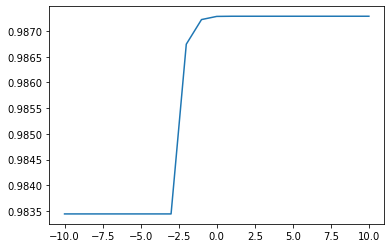

Our optimal C is 10.000000
Our accuracy at optimal C is 0.987288


In [20]:
# Using 10-fold cross validation to find the best tuning parameter - C. Using 'liblinear' and l1 penalty.

c_list = np.logspace(-10,10,21) 
c_index = np.linspace(-10,10,21)

# C is just the inverse of Lambda - the smaller the C - the stronger the regulatization.

cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
    cv_scores.append(cross_val_score(lm, X, y,cv = 10, scoring = 'accuracy').mean())

plt.plot(c_index, cv_scores)
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))

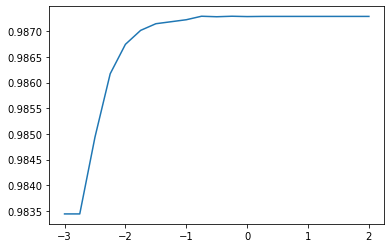

Our optimal C is 0.177828
Our accuracy at optimal C is 0.987291


In [21]:
# Localizing the search around the values we found above.

c_list = np.logspace(-3,2,21) 
c_index = np.linspace(-3,2,21)

cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
    cv_scores.append(cross_val_score(lm, X, y,cv = 10, scoring = 'accuracy').mean())

plt.plot(c_index, cv_scores)
plt.show()

print("Our optimal C is %f" %c_list[np.argmax(cv_scores)])   
print("Our accuracy at optimal C is %f" %np.max(cv_scores))

In [22]:
# Using the best C we found above and repeating the analysis and coefficients.

lm = LogisticRegression(C = 0.177828,  solver = 'liblinear', max_iter  = 10000, penalty = 'l1')
lm.fit(X,y)
print("\033[1m" + 'Intercept:' + "\033[0m", round(lm.intercept_[0],3))
print('')
print("\033[1m" + 'Coefficients:' + "\033[0m")
ArrayToList = lm.coef_.tolist()  
coefficients = ArrayToList[0]
c = zip(listOfAllVariables,coefficients)
for a,b in c:
    print('   ',a,':',round(b,5))

Intercept: -10.364

Coefficients:
    age : -2.67186
    new_user : -1.71537
    total_pages_visited : 9.7018
    Country_Germany : 3.38311
    Country_UK : 3.20374
    Country_US : 2.82972
    Source_Direct : -0.17328
    Source_Seo : -3e-05


###### Based on our analysis above and the coefficients, we reckon that Source_Seo is not a significant variable, thus, we decide to drop it from our variable list.

In [23]:
# Defining the new X and y. (Dropping Source_Seo)

listOfAllVariables = ConversionData.columns.values
X = ConversionData[listOfAllVariables]
del X['converted']
del X['Source_Seo']
y = ConversionData['converted']

In [24]:
# To fit the Logistic Regression model again for the final analysis. 

lm3 = LogisticRegression()
lm3.fit(X,y)
print("\033[1m" + 'Intercept:' + "\033[0m", round(lm1.intercept_[0],3))
print('')
print("\033[1m" + 'Coefficients:' + "\033[0m")
ArrayToList = lm3.coef_.tolist()  
coefficients = ArrayToList[0]
c = zip(listOfAllVariables,coefficients)
for a,b in c:
    print('   ',a,':',round(b,4))

Intercept: -9.818

Coefficients:
    age : -2.6872
    new_user : -1.7199
    total_pages_visited : 9.7133
    Country_Germany : 3.573
    Country_UK : 3.3873
    Country_US : 3.0112
    Source_Direct : -0.1817


## Recommendations: 


1. Based on the logistic regression model, we reckon that total_pages visited is the best variable. It has the highest effect on conversion rate. The higher the number of pages visited, more the odds of the user converting. 
    - Thus, our recommendation to the product team will be to make the website more interactive, thereby luring users to visit more pages and increasing the odds of conversion.
    - Our EDA also suggests that the average number of pages visited by a user who converted was 11. This number seems a bit too much for any potential user. We would want users to visit lesser pages and convert as quickly as possible. Thus, our recommendation to the marketing team would be to market the product in such a way (using ads or SEO) that a potential customer directly visits a product page that he/she might be interested in buying.
    
    
2. Our logistic regression model also suggests that it is not very likely for any new user to convert—the odds of a new user converting decreases with an increase in every new user.
    - Thus, our recommendation to the marketing team will be to increase promotional offers for new users, which lure them into making purchases.
    
    
3. Our logistic regression model and EDA suggest that the conversion rate for any user is decent in the US, UK, and Germany but very low in China.
    - Thus our recommendations for the marketing team will be to invest more in marketing in China. Increasing exposure in China could lead to an improved conversion rate.
    - Now that we have understood that the US, UK, and Germany have a decent conversion rate. We could work towards potentially scaling that even further. Thus, our recommendation to the marketing team will be to focus on increased exposure (via SEO or ads) to increase user engagement. Also, providing promotional offers could help.
    
    
4. Our logistic regression model suggests that SEO has not been doing any great. Users who came to the site by clicking through the search results have not converted as much as those who came to the website by clicking on an ad.
    - In this case, we could focus more on ads and scale that. We could also channelize the time and money spent on SEO towards the ads.
    
    
5. Our logistic regression model also suggests that the odds of a user converting decrease drastically for every year increase in age. Based on our EDA, the average age of converted users is 26.
    - Therefore our recommendation to the marketing team is to focus more on the target audience aged 21 to 31. 
    - Also, we would recommend that the product team build the products and the website that caters to that age group.

------------------

### <center> Random Forest Model - To make Predictions

In [25]:
# Defining the new X and y. 

listOfAllVariables = ConversionData.columns.values
X = ConversionData[listOfAllVariables]
del X['converted']
y = ConversionData['converted']

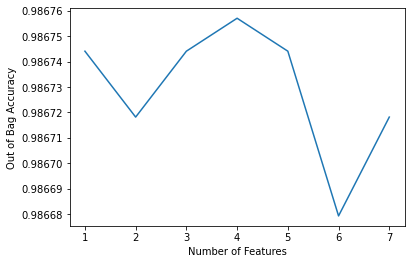

In [26]:
# Lets tune the model to avoid overfitting results. Thus, we tune on number of features to be included in our model. 

Features = range(1,8)
oob_score_RF = []
for i in Features:
        RFClass = RandomForestClassifier(n_estimators = 1000, #Number of trees - the more the better!
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 5, #Minimum number of observations at each terminal node
                           oob_score = True,
                           random_state = 1,
                           n_jobs = -1)
        RFClass.fit(X,y)  
        oob_score_RF.append(RFClass.oob_score_)

plt.plot(Features, oob_score_RF)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Accuracy")
plt.show() 

Based on the above graph, we find that the optimal number of features to include in our model is 4. It gives the best out of bag accuracy.

In [27]:
# Using the tuned parameter found above, we fit the Random Forest Model to our data.

from sklearn.ensemble import RandomForestClassifier

RFClass = RandomForestClassifier(n_estimators = 1000, 
                                 max_features = 4, 
                                 min_samples_leaf = 5,
                                 oob_score = True,
                                 random_state = 1,
                                 n_jobs = -1)
RFClass.fit(X, y)
print("Out of Bag Accuracy  = %f" %RFClass.oob_score_)
scores = cross_val_score(RFClass, X, y, cv = 10)
print("Cross-validation Accuracy = %f" %scores.mean())

Out of Bag Accuracy  = 0.986886
Cross-validation Accuracy = 0.986893


In [28]:
print("Misclassificationn error for oob = %f percent" %((1-RFClass.oob_score_)*100))

Misclassificationn error for oob = 1.311352 percent


We get a misclassification error of 1.31%. Our model does a decent job. However, we should check if Boosting algorithm does a better job.

------------------------------------------------------------------------------------------------------------------------

### <center> Boosting Algorithm - To make Predictions

In [29]:
# Defining the new X and y. 

listOfAllVariables = ConversionData.columns.values
X = ConversionData[listOfAllVariables]
del X['converted']
y = ConversionData['converted']

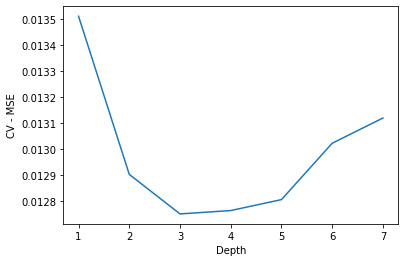

In [30]:
# Tuning the boosting model on max_depth (Number of splits in each tree) - to find the best max_depth. 
# We tune the model on multiple parameters to find the optimal model to fit our data. 
# If we don't tune the model, it can give us an overfitted result. 

from sklearn.ensemble import GradientBoostingClassifier

Depth = range(1,8)
Score = []
for i in Depth:
                GBC_Tree = GradientBoostingClassifier(learning_rate = 0.01,
                                      n_estimators = 1000,
                                      max_depth = i,
                                      min_samples_leaf = 10,
                                      random_state = 1)
                
                Score.append(-cross_val_score(GBC_Tree, X, y, cv=10, scoring='neg_mean_squared_error', n_jobs = -1).mean())

plt.plot(Depth, Score)
plt.xlabel("Depth")
plt.ylabel("CV - MSE")
plt.show() 

In [31]:
Index_Min = np.argmin(Score)
Optimal_depth = round(Depth[Index_Min],0)
print("Optimal Depth = %f which leads to minimum error of %f." %(Optimal_depth, np.min(Score)))

Optimal Depth = 3.000000 which leads to minimum error of 0.012751.


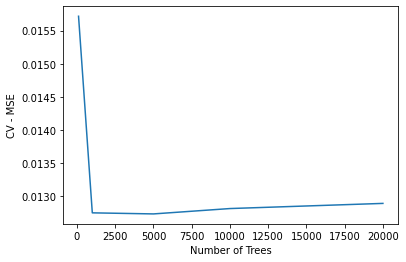

In [32]:
# Using Max_depth =3, that we found above. 
# Tuning the boosting model on NumberOfTrees - to find the best number of trees.

Score = []
NumberOfTrees = [100,1000,5000,10000,20000]
for i in NumberOfTrees:
                GBC_Tree = GradientBoostingClassifier(learning_rate = 0.01,
                                             n_estimators = i, 
                                             max_depth = Optimal_depth,
                                             min_samples_leaf = 10)
        
                Score.append(-cross_val_score(GBC_Tree, X, y, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1).mean())

plt.plot(NumberOfTrees, Score)
plt.xlabel("Number of Trees")
plt.ylabel("CV - MSE")
plt.show()

In [33]:
Index_Min = np.argmin(Score)
Optimal_tree = NumberOfTrees[Index_Min]
print("Optimal tree = %i which leads to minimum error of %f." %(Optimal_tree, np.min(Score)))

Optimal tree = 5000 which leads to minimum error of 0.012735.


Now, that we have the best tuning parameters, we fit the data to our Boosting model. 

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

GBC_Tree = GradientBoostingClassifier(learning_rate = 0.01,
                                      n_estimators = 5000,
                                      max_depth = 3,
                                      min_samples_leaf = 10,
                                      random_state = 1) 


kf = KFold(n_splits=10, shuffle=True) 

scores = []

y = ConversionData['converted']

for train_index, test_index in kf.split(X):        
        GBC_Tree.fit(X.iloc[train_index], y.iloc[train_index])
        y_hat_test = GBC_Tree.predict(X.iloc[test_index]) 
        scores.append(float(sum(y_hat_test == y.iloc[test_index]))/len(y_hat_test))

Score_GBC_CV = np.mean(scores)    

print(Score_GBC_CV)

0.9872198205846775


In [35]:
print("Misclassificationn error for oob = %f percent" %((1-Score_GBC_CV)*100))

Misclassificationn error for oob = 1.278018 percent


In [36]:
y_hat = GBC_Tree.predict(X)
print(y_hat)

[0 0 0 ... 0 0 0]


In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_hat)

array([[303040,    838],
       [  3035,   2081]], dtype=int64)

In [38]:
confmat = confusion_matrix(y, y_hat)
TN = confmat[0,0] #True Negative
FN = confmat[1,0] #False Negative
FP = confmat[0,1] #False Positive
TP = confmat[1,1] #True Positive

In [39]:
Err = float(FP + FN)/(FP + FN + TP + TN) #Prediction Error
Acc = float(TP + TN)/(FP + FN + TP + TN) #Prediction Accuracy
FPR = float(FP)/(FP + TN)  #False Positive Rate
TNR = float(TN)/(FP + TN)  #True Negative Rate
TPR = float(TP)/(FN + TP)  #True Positive Rate
FNR = float(FN)/(FN + TP)  #False Negative Rate
print("False Positive Rate = %f" %FPR)
print("False Negative Rate = %f" %FNR)
print("True Positive Rate = %f" %TPR)
print("True Negative Rate = %f" %TNR)
print("Misclassification Error = %f" %Err)
print("Accuracy = %f" %Acc)

False Positive Rate = 0.002758
False Negative Rate = 0.593237
True Positive Rate = 0.406763
True Negative Rate = 0.997242
Misclassification Error = 0.012534
Accuracy = 0.987466


In [40]:
Correctly_Predicted_NotConverted = sum((y == 0) & (y_hat == 0))
Correctly_Predicted_Converted = sum((y == 1) & (y_hat == 1))
Mistakenly_Predicted_NotConverted = sum((y == 1) & (y_hat == 0))
Mistakenly_Predicted_Converted = sum((y == 0) & (y_hat == 1))


print("Correcty Predicted Not Converted = %.f" %Correctly_Predicted_NotConverted)
print("Correcty Predicted Converted = %.f" %Correctly_Predicted_Converted)
print("Mistakenly Predicted Not Converted = %.f" %Mistakenly_Predicted_NotConverted)
print("Mistakenly Predicted Converted = %.f" %Mistakenly_Predicted_Converted)

Correcty Predicted Not Converted = 303040
Correcty Predicted Converted = 2081
Mistakenly Predicted Not Converted = 3035
Mistakenly Predicted Converted = 838
